#### Representatives extraction from bgsu database (3A resolution constraint)
[Link](http://rna.bgsu.edu/rna3dhub/nrlist/release/3.242/3.0A)

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import os
from rna2d.pipelines import BGSURepresentatives
PATH = "../external-files/nrlist_3.242_3.0A.csv"
bgsu = BGSURepresentatives()
pdbs = bgsu.extract_representatives(PATH)
with open('../metadata/representants.txt', 'w') as f:
    out = "\n".join(pdbs)
    f.writelines(out)

In [42]:
import os
train_pdbs = "../external-files/PDB_dataset/TR1_sequences/"
test_pdbs1 = "../external-files/PDB_dataset/TS1_sequences/"
test_pdbs2 = "../external-files/PDB_dataset/TS2_sequences/"

def get_pdb_ids(path):
    pdbs = os.listdir(path)
    pdbs = [p.replace("-", "_") for p in pdbs]
    pdbs = [f'{p[:4].upper()}{p[4:]}' for p in pdbs]
    return pdbs

trpdbs = get_pdb_ids(train_pdbs)
tspdbs1 = get_pdb_ids(test_pdbs1)
tspdbs2 = get_pdb_ids(test_pdbs2)
tspdbs1.extend(tspdbs2)
print(trpdbs[:10])
print(len(trpdbs), len(tspdbs1), len(tspdbs2))

['3SKI_1_A', '2HVY_1_E', '4PMI_1_A', '1FFK_1_9', '2CSX_1_C', '2ZNI_1_C', '4Y1J_1_A', '4KZD_1_R', '4V83_1_AV', '2A64_1_A']
120 106 39


Cząsteczki ze zbioru treningowego SPOT-RNA wśród reprezentantów:

In [43]:
intersection = set(pdbs).intersection(trpdbs)
diffrerence = set(pdbs).difference(trpdbs)
print(f'Intersection: {len(intersection)}')
print(f'Diffrefence: {len(diffrerence)}')
with open("../metadata/representants-filtered-training.txt", 'w') as f:
    out = "\n".join(diffrerence)
    f.writelines(out)

Intersection: 57
Diffrefence: 1589


In [44]:
%autoreload 2
from rna2d.pipelines import Results

all_path = "/data/2d-rna/2d-rna-analysis/results/all-results.rpt"
wc_path = "/data/2d-rna/validation-canon-non0/results.rpt"
nwc_path = "/data/2d-rna/validation-noncanon-non0/results.rpt"
pk_path = "/data/2d-rna/validation-pseudoknots/results.rpt"

rall = Results(all_path)
rwc = Results(wc_path)
rnwc = Results(nwc_path)
rpk = Results(pk_path)

all_res, all_ind = rall.run_for_all()
all_fres, all_find = rall.filter_by_molecules(all_res, all_ind, "../metadata/representants-filtered-training.txt")
print(len(all_res['spot-rna']), len(all_fres['spot-rna']))

wc_res, wc_ind = rwc.run_for_all()
wc_fres, wc_find = rwc.filter_by_molecules(wc_res, wc_ind, "../metadata/representants-filtered-training.txt")
print(len(wc_res['spot-rna']), len(wc_fres['spot-rna']))

nwc_res, nwc_ind = rnwc.run_for_all()
nwc_fres, nwc_find = rnwc.filter_by_molecules(nwc_res, nwc_ind, "../metadata/representants-filtered-training.txt")
print(len(nwc_res['spot-rna']), len(nwc_fres['spot-rna']))

pk_res, pk_ind = rpk.run_for_all()
pk_fres, pk_find = rpk.filter_by_molecules(pk_res, pk_ind, "../metadata/representants-filtered-training.txt")
print(len(pk_res['spot-rna']), len(pk_fres['spot-rna']))


Results missing for method: ufold for molecule:                        6T3N_1_A
7354 497
7230 461
6625 447
1570 101


In [45]:
order = [
    'contextFold',
    'contrafold',
    'mxfold',
    'e2efold',
    'mxfold2',
    'rna-state-inf',
    'spot-rna',
    'ufold',
    'ipknot',
    'rnafold',
    'rna-structure'
    ]

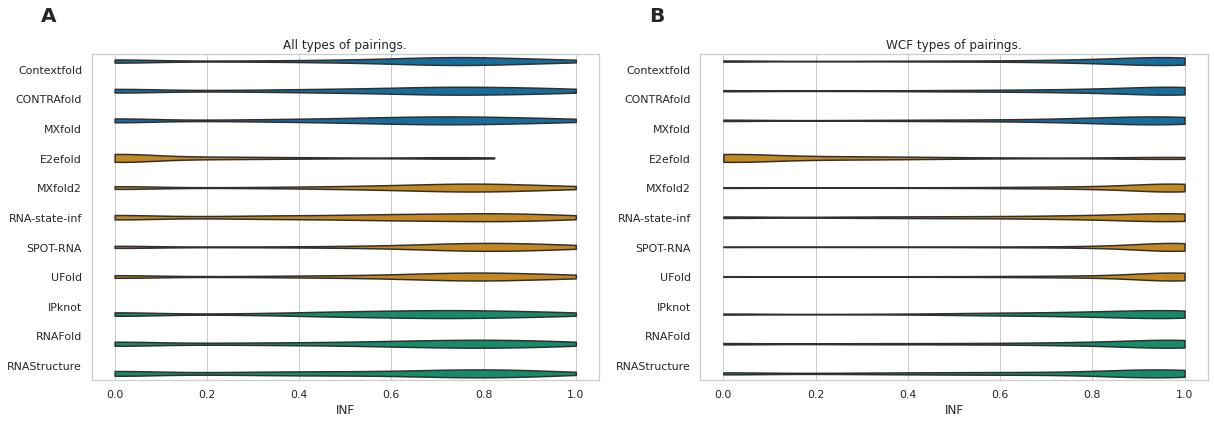

In [46]:
%autoreload 2
from rna2d.visualization import Violinplot, SeabornData, get_type_colors
import matplotlib.pyplot as plt

colors = get_type_colors()

v = Violinplot()
sall = SeabornData(all_fres, all_find)
swc = SeabornData(wc_fres, wc_find)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns_all = sall.get_sns_format_data(order=order, colors_dict=colors)
sns_wc = swc.get_sns_format_data(order=order, colors_dict=colors)
v.plot(sns_all, axs[0], "A", "All types of pairings.", x_axis=True)
v.plot(sns_wc, axs[1], "B", "WCF types of pairings.", x_axis=True)



In [47]:
from rna2d.utils import get_means_stds, get_DataFrames
%autoreload 2

noncanon_methods = ['spot-rna', 'ufold', 'e2efold']
pk_methods = ['spot-rna', 'e2efold', 'ipknot', 'ufold']

all_means, all_stds, all_dfs = get_means_stds(
    all_fres, all_find, names=True, out_path='../results/all-bgsu')
all_dfmeans, all_dfstds = get_DataFrames(
    all_means, all_stds, out_path="../results/all-bgsu", name='all')

wc_means, wc_stds, wc_dfs = get_means_stds(
    wc_fres, wc_find, names=True, out_path='../results/canon-bgsu')
wc_dfmeans, wc_dfstds = get_DataFrames(
    wc_means, wc_stds, out_path="../results/canon-bgsu", name='canon')

nwc_means, nwc_stds, nwc_dfs = get_means_stds(
    nwc_fres, nwc_find, names=True, out_path='../results/noncanon-bgsu', selected_methods=noncanon_methods)
nwc_dfmeans, nwc_dfstds = get_DataFrames(
    nwc_means, nwc_stds, out_path="../results/noncanon-bgsu", name='noncanon')

pk_means, pk_stds, pk_dfs = get_means_stds(
    pk_fres, pk_find, names=True, out_path='../results/pseudo-bgsu', selected_methods=pk_methods)
pk_dfmeans, pk_dfstds = get_DataFrames(
    pk_means, pk_stds, out_path="../results/pseudo-bgsu", name='pseudo')


In [48]:
wc_dfmeans

,PPV,TPR,F1,INF
Contextfold,0.74,0.83,0.78,0.78
CONTRAfold,0.75,0.80,0.77,0.77
E2efold,0.22,0.33,0.25,0.26
MXfold,0.71,0.80,0.75,0.75
MXfold2,0.79,0.86,0.82,0.82
RNA-state-inf,0.71,0.76,0.73,0.73
SPOT-RNA,0.83,0.90,0.86,0.86
IPknot,0.73,0.81,0.77,0.77
RNAFold,0.73,0.78,0.75,0.75
RNAStructure,0.66,0.73,0.69,0.69


In [49]:
nwc_dfmeans

,PPV,TPR,F1,INF
E2efold,0.01,0.03,0.02,0.02
SPOT-RNA,0.18,0.27,0.21,0.22
UFold,0.10,0.13,0.11,0.11


In [50]:
pk_dfmeans

,PPV,TPR,F1,INF
E2efold,0.01,0.02,0.01,0.01
IPknot,0.09,0.11,0.10,0.10
SPOT-RNA,0.24,0.27,0.25,0.26
UFold,0.27,0.27,0.27,0.27


In [51]:
print(len(all_dfs['SPOT-RNA']))
print(len(wc_dfs['SPOT-RNA']))
print(len(nwc_dfs['SPOT-RNA']))
print(len(pk_dfs['SPOT-RNA']))

497
461
447
101


In [52]:
set(all_dfs['SPOT-RNA'].index).difference(wc_dfs['SPOT-RNA'].index)

{'1B7F_1_Q',
 '1G2E_1_B',
 '1SDS_1_D',
 '2ASB_1_B',
 '2ATW_1_B',
 '3AGV_1_S',
 '3BOY_1_D',
 '3DD2_1_B',
 '3IBK_1_A',
 '3IBK_1_B',
 '3IEV_1_D',
 '3MIJ_1_A',
 '3QJJ_1_Q',
 '3X1L_1_I',
 '4PWD_1_T',
 '4QQB_1_P',
 '4W5N_1_B',
 '5HO4_1_B',
 '5L2L_1_D',
 '5WWE_1_B',
 '5WWF_1_B',
 '5WZG_1_B',
 '5WZI_1_B',
 '5WZJ_1_B',
 '5WZK_1_B',
 '6IFN_1_N',
 '6JJH_1_B',
 '6O16_1_C',
 '6VQV_1_L',
 '6XN5_1_R',
 '6XRQ_1_A',
 '6XRQ_1_B',
 '6YYM_1_B',
 '7A9W_1_B',
 '7A9X_1_B',
 '7MQA_1_L0'}